In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections #---> Library for operating with dictionaries
import random #---> Library for generating random numbers/distributions
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
from pylab import rcParams #---> 
from operator import itemgetter 
 
import powerlaw
import seaborn as sns
import matplotlib.colors as mcolors
from itertools import count
import matplotlib.cm as cm
import community
import igraph
from collections import Counter
import matplotlib as mpl
import matplotlib.patches as patches
import random
import time

In [2]:
#Load the Network in a graph G
Gx = nx.read_edgelist('infect-dublin.edges.txt', nodetype=int, create_using=nx.Graph(),data=(('weight',float),))


SI Model.

Define the function SI_model() that inputs:

• G (Network as networkx)

• initial_infecteds (as list of nodes ID)

• beta (trasmission probability as float)

• t_simulation (simulation iteration time as int)

Output: A dictionary that contains the nodes status at each time steps. In this case the status can be:

• ’S’ as susceptible.

• ’I’ as Infected.

Using the network Gx and beta=0.01, t_simulation=300, initial_infecteds=(list of 3 random nodes)
plot the number of user in each status at each time step of the simulation.

(Note: sampling matters. To run 100 simulations a pc should not take more than 3 minutes. Please select a
correct amount of simulations to validate your analysis.)

In [3]:
def SI_model(Gx,beta,t_simulation,initial_infecteds):
    
    #add default status 'S' to all nodes
    nx.set_node_attributes(Gx, 'S', "Status")
    Gx_node=list(Gx.nodes)
    Gx_node.sort()

    #creating an Infection history of all nodes from t=0 to 300
    Infection_history=np.zeros((len(Gx_node),t_simulation+1))

    #update the status of initial infected nodes
    for i in initial_infecteds:
        Gx.nodes[i]['Status'] = 'I'
        Infection_history[i-1][0]=1       

    
    for t in range(1,(t_simulation+1)):
        
        i_list=[]
        Infection_list=[x for x,y in Gx.nodes(data=True) if y['Status']=='I']
        
        #for each infected node
        for i in Infection_list:
            #updating the history with the infected nodes
            Infection_history[i-1][t]=1
            
            #find the neighbours of the infected node
            neighbors=list(nx.all_neighbors(Gx,i))
            for n in neighbors:
                if Gx.nodes[n]['Status'] == 'I':
                    continue
                else:
                    #infecting the neighbors with a probability of beta
                    prob=np.random.uniform(0,1)
                    if prob<=beta:
                        Gx.nodes[n]['Status'] = 'I'
                        i_list.append(n)
        
        #updating the history with the new infected nodes 
        for j in i_list:
            Infection_history[j-1][t]=1
        
                       
    #creating a dictionary of nodes' status at each timestamp
    l=Infection_history.tolist() 
    l1=[]
    for i in range(len(l)):
        l2=[]
        for j in range(len(l[i])):
            if l[i][j]==0:
                l2.append('S')
            else:
                l2.append('I')
        l1.append(l2)
        
    d=zip(Gx_node, l1)
    dic=dict(d)

    return dic

def plot_SI(x_n,s_n,t_simulation):
    I=x_n.tolist()
    S=s_n.tolist()
    
    X=[i for i in range(t_simulation+1)]
    plt.figure(figsize = (40,30))
    plt.plot(X,I,'go',linestyle='solid')
    plt.plot(X,S,'ro',linestyle='solid')
    plt.xlabel("Simulation time",fontsize=25)  # add X-axis label
    plt.ylabel("No. of users",fontsize=25)  # add Y-axis label
    plt.title("SI model",fontsize=35)
    plt.legend(["Infected", "Susceptible"],fontsize=20)
    plt.xticks(fontsize=35)
    plt.yticks(fontsize=35)
    plt.show()





Run the model

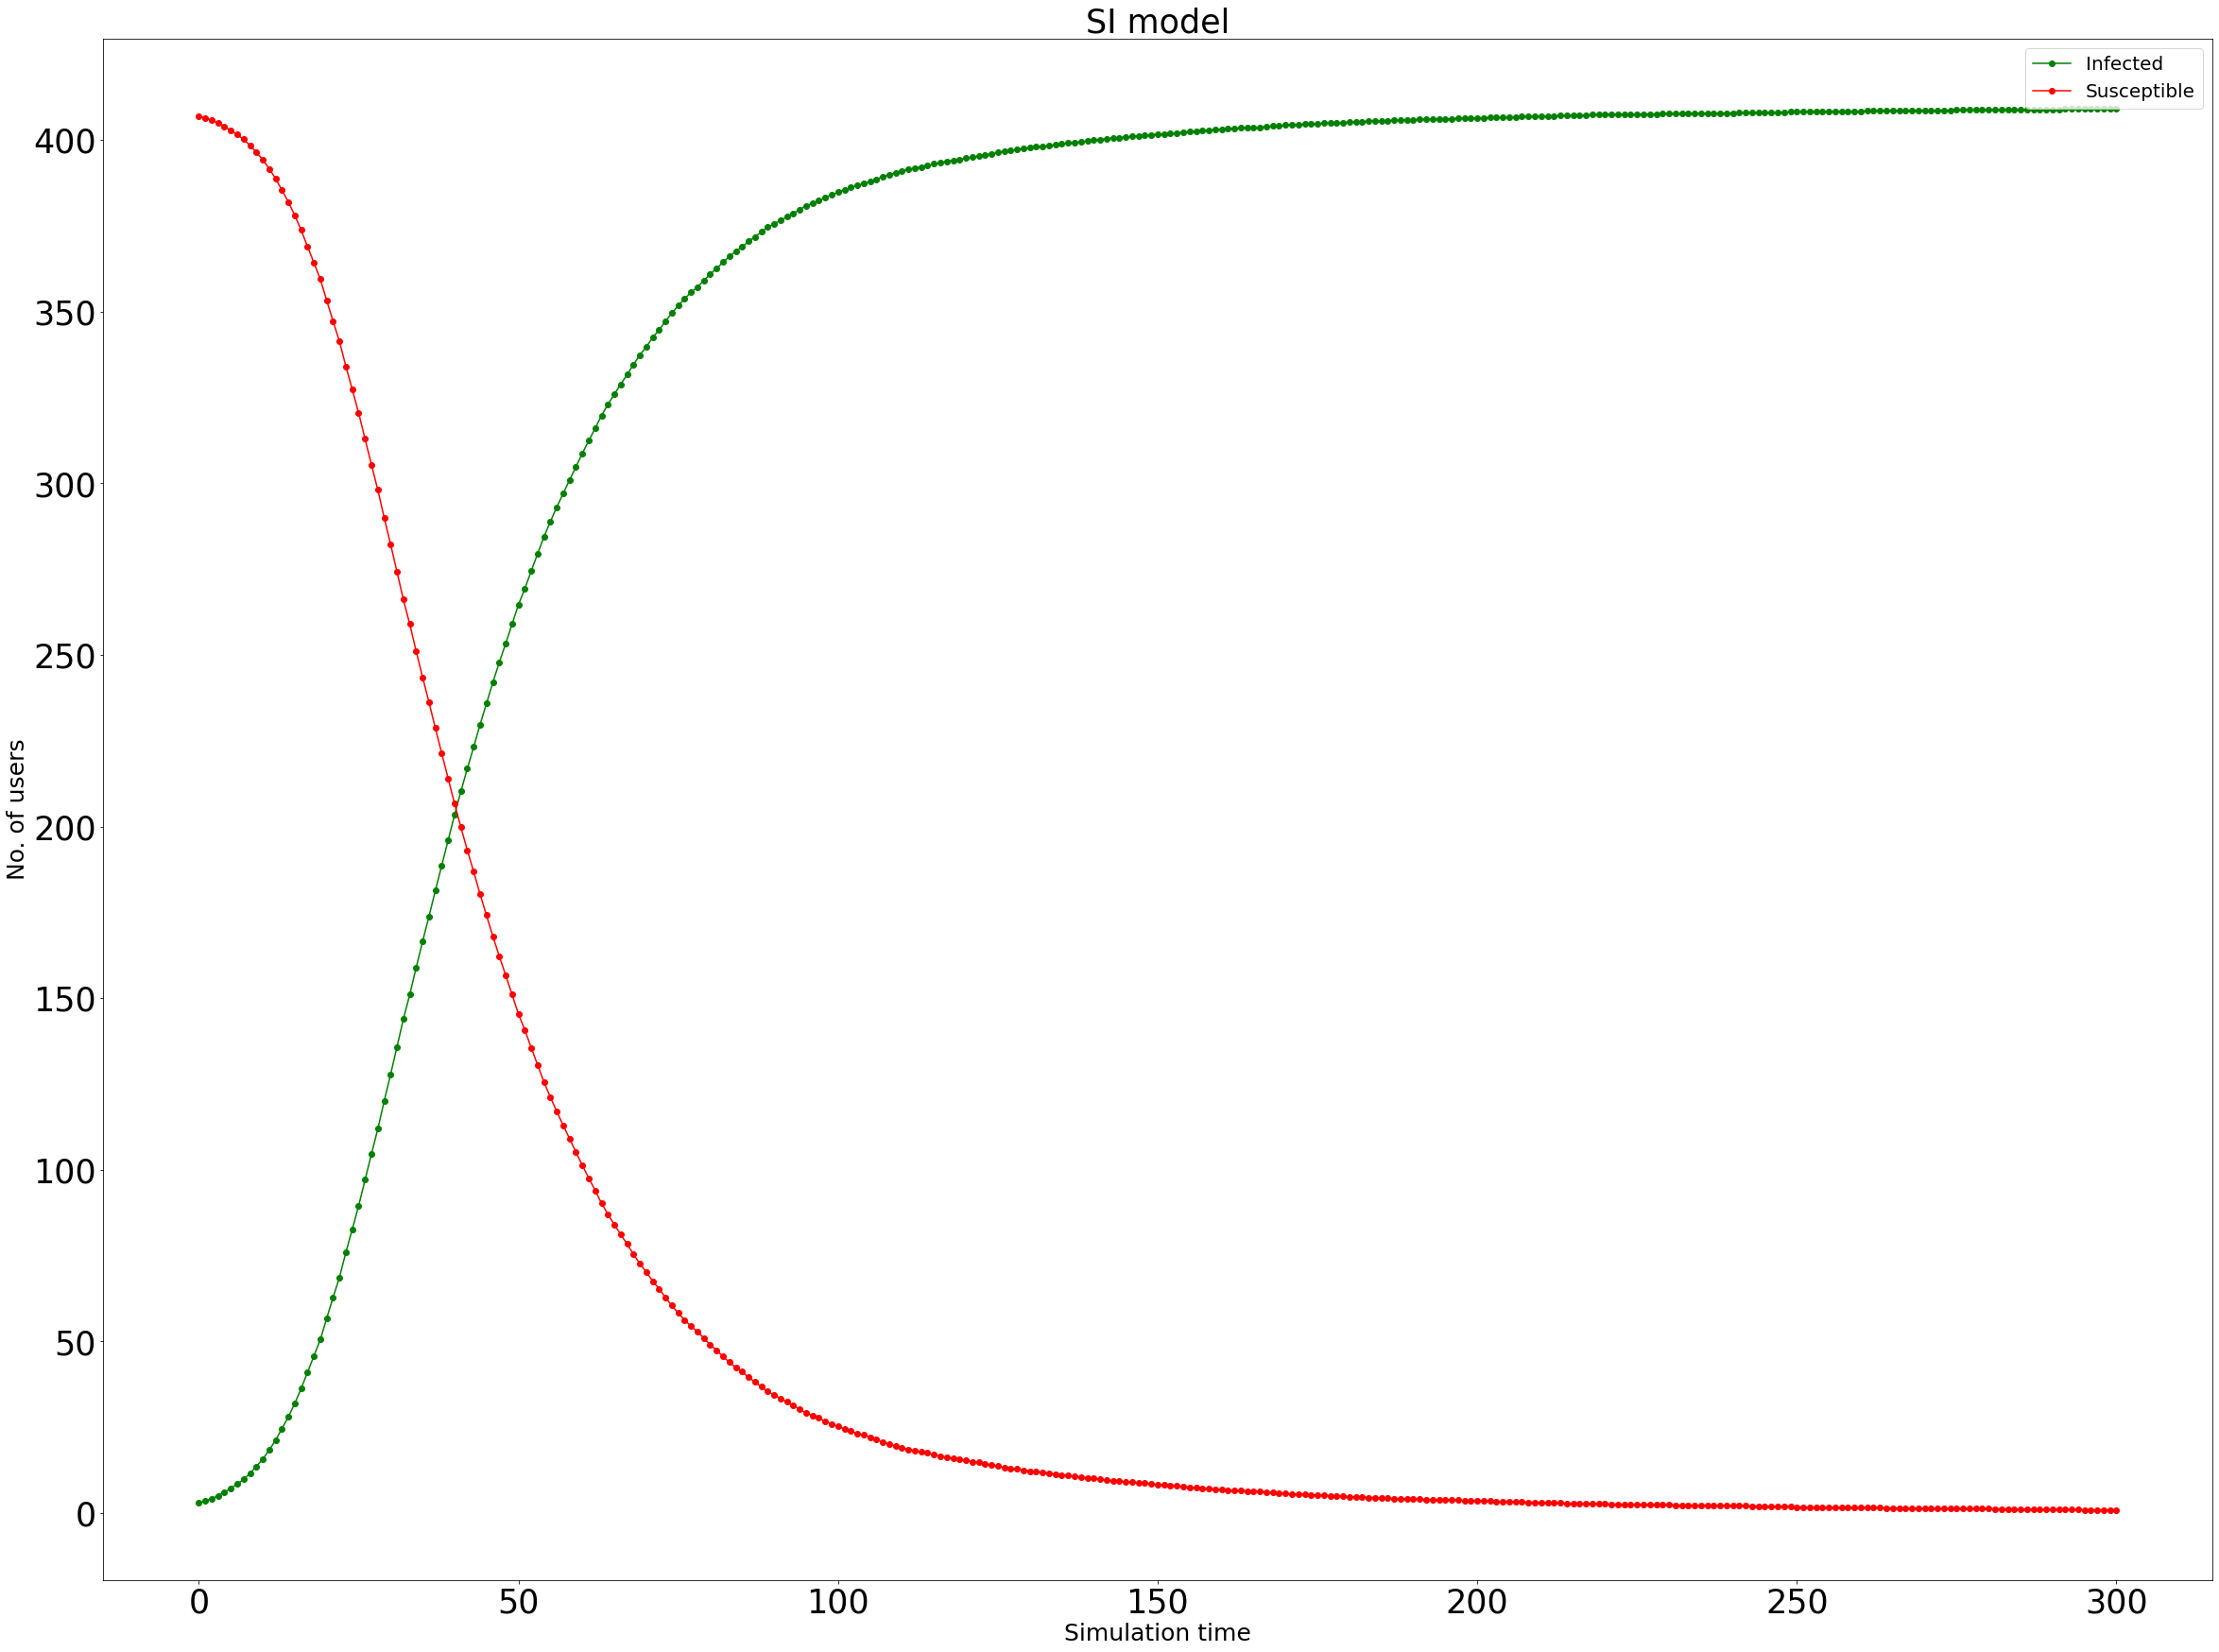

In [4]:
beta=0.01
t_simulation=300
initial_infecteds=[100,200,300]   

x_n=[]
s_n=[]

start = time.time()

#100 simulations

for t in range(100):

    Infections_t=SI_model(Gx,beta,t_simulation,initial_infecteds)
    Infections_val=list(Infections_t.values())
    l1_x=[]
    l1_s=[]
    for j in range(t_simulation+1):
        x_sum=0
        s_sum=0
        for i in range(len(Infections_val)):
            if Infections_val[i][j]=='I':
                x_sum+=1
            else:
                s_sum+=1
        l1_x.append(x_sum)
        l1_s.append(s_sum)
    x_n.append(l1_x)
    s_n.append(l1_s)

x_n=np.array(x_n)
s_n=np.array(s_n)
#getting the mean for each day for 100 simulations
x_t=x_n.mean(axis=0)
s_t=s_n.mean(axis=0)

#plot the SI model for 100 simulations

plot_SI(x_t,s_t,t_simulation)
            
            

#print("--- %s seconds ---" % (time.time() - start))

The above plot shows the number of users that are Susceptible and Infected on each day. We can see that the number of infections rise rapidly and after day 100 90% of the population are infected.

Pictorial representation of the simulation, i.e, spread of disease in SI model

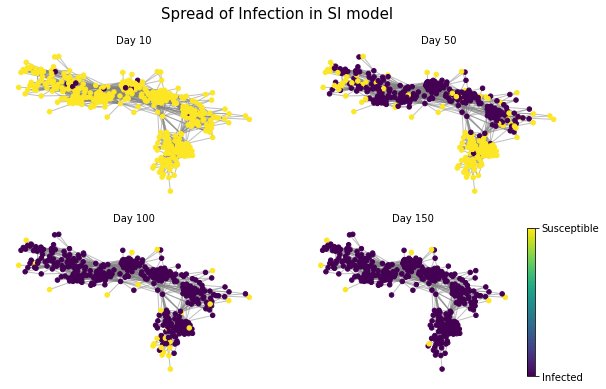

In [7]:

def plot_nodestatus(Gx,node_list,day10,day50,day100,day150):
    
    plt.rcParams["figure.figsize"] = (10,6)
    fig, axes = plt.subplots(nrows=2, ncols=2)
    
    ax = axes.flatten()
    
    
    pos=nx.spring_layout(Gx)
    edge_list=Gx.edges
    norm = mcolors.Normalize(vmin = 0, vmax = 1)
    smp = cm.ScalarMappable(norm=norm, cmap = cm.viridis)
    cbar = plt.colorbar(smp, )
    cbar.set_ticks(range(0, 2))
    cbar.set_ticklabels(["Infected","Susceptible"])
    plt.axis('off')
    
    #plot the 4 chosen days
    nx.draw_networkx_nodes(Gx, pos, nodelist = node_list, node_color = day10, node_size = 20,ax=ax[0])
    nx.draw_networkx_edges(Gx,pos,edgelist=edge_list,edge_color='gray',width=1,alpha=0.5,ax=ax[0])
   
    ax[0].set_title("Day 10",fontsize=10)
    ax[0].set_axis_off()
    
    nx.draw_networkx_nodes(Gx, pos, nodelist = node_list, node_color = day50, node_size = 20,ax=ax[1])
    nx.draw_networkx_edges(Gx,pos,edgelist=edge_list,edge_color='gray',width=1,alpha=0.5,ax=ax[1])
    ax[1].set_title("Day 50",fontsize=10)
    ax[1].set_axis_off()
    
    nx.draw_networkx_nodes(Gx, pos, nodelist = node_list, node_color = day100, node_size = 20,ax=ax[2])
    nx.draw_networkx_edges(Gx,pos,edgelist=edge_list,edge_color='gray',width=1,alpha=0.5,ax=ax[2])
    ax[2].set_title("Day 100",fontsize=10)
    ax[2].set_axis_off()
    
    nx.draw_networkx_nodes(Gx, pos, nodelist = node_list, node_color = day150, node_size = 20,ax=ax[3])
    nx.draw_networkx_edges(Gx,pos,edgelist=edge_list,edge_color='gray',width=1,alpha=0.5,ax=ax[3])
    ax[3].set_title("Day 150",fontsize=10)
    ax[3].set_axis_off()
    
    fig.suptitle("Spread of Infection in SI model",fontsize=15)
    
    plt.show()
    
    
#get the staus of the nodes for chosen days
node_list=list(Infections_t.keys())
infection_hist=list(Infections_t.values())
infection_hist=np.array(infection_hist)

day10=infection_hist[:,10:11].tolist()
day50=infection_hist[:,50:51].tolist()
day100=infection_hist[:,100:101].tolist()
day150=infection_hist[:,150:151].tolist()

day10=[item for sublist in day10 for item in sublist]
day50=[item for sublist in day50 for item in sublist]

day100=[item for sublist in day100 for item in sublist]
day150=[item for sublist in day150 for item in sublist]


color10=[]
color50=[]
color100=[]
color150=[]
#Color the nodes based on the status for each day

for i in range(len(day10)):
    if day10[i]=='I':
        color10.append(0)
        
    if day10[i]=='S':
        color10.append(1)
        
   
        
        
for i in range(len(day50)):
    if day50[i]=='I':
        color50.append(0)
        
    if day50[i]=='S':
        color50.append(1)
    
        
        
for i in range(len(day100)):
    if day100[i]=='I':
        color100.append(0)
        
    if day100[i]=='S':
        color100.append(1)
        
   
        
        
for i in range(len(day150)):
    if day150[i]=='I':
        color150.append(0)
    if day150[i]=='S':
        color150.append(1)
   


    
plot_nodestatus(Gx,node_list,color10,color50,color100,color150)

Above figure show the simulation of the spread of infection in SI model on Day 10, Day 50, Day 100 and Day 150. As we can see that most of the nodes are infected by day 100.